## Objective

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.
Instructions

Part1: supervised learning

    Load the dataset of kidney disease.
    Use this command to rename the columns:  data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
     Apply logistic regression, and print the confusion matrix to validate your model. 
     Apply KNN and choose the optimal number of neighbors
    Apply decision tree, plot it and calculate the accuracy.
    Apply random forest, calculate the new accuracy and compare it with the previous result.

Part2: unsupervised learning

    Drop out the target variable (named “classification”)
     Use hierarchical clustering to identify the inherent groupings within your data.
     Plot the clusters. 
     Plot the dendrogram. Use k-means clustering and select the optimal k.
     Plot the clusters. 

In [135]:
import pandas as pd

data = pd.read_csv('kidney_disease.csv')

In [136]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [138]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific_gravity','al':'albumin','su':'sugar',
                     'rbc':'red_blood_cells','pc':'pus_cell','pcc':'pus_cell_clumps','ba':'bacteria',
                     'bgr':'blood_glucose_random','bu':'blood_urea','sc':'serum_creatinine','sod':'sodium',
                     'pot':'potassium','hemo':'hemoglobin','pcv':'packed_cell_volume','wc':'white_blood_cell_count',
                     'rc':'red_blood_cell_count','htn':'hypertension','dm':'diabetes_mellitus',
                     'cad':'coronary_artery_disease','appet':'appetite','pe':'pedal_edema','ane':'anemia','classification':'class'},inplace=True)

## Data Exploration




In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [140]:
data.duplicated().sum()

0

In [141]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

## Preprocessing and Cleaning

In [142]:
#Removing null values 

data['age'].fillna(data['age'].mean(), inplace = True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace = True)
data['specific_gravity'].fillna(data['specific_gravity'].mean(), inplace = True)
data['albumin'].fillna(data['albumin'].mean(), inplace = True)
data['sugar'].fillna(data['sugar'].mean(), inplace = True)
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace = True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace = True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace = True)
data['sodium'].fillna(data['sodium'].mean(), inplace = True)
data['potassium'].fillna(data['potassium'].mean(), inplace = True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace = True)

In [143]:
# Filling Null value for White blood cel and red blood cell count

data['white_blood_cell_count'] = data['white_blood_cell_count'].replace('\t?') # Removing the ? item
data['red_blood_cell_count'] = data['red_blood_cell_count'].replace('\t?')
data['white_blood_cell_count'].fillna(-1, inplace = True) # First replace the null values with -1
data['red_blood_cell_count'].fillna(-1, inplace = True)
data['white_blood_cell_count'] = data['white_blood_cell_count'].astype(float) # converting the object data type to float
data['red_blood_cell_count'] = data['red_blood_cell_count'].astype(float)
data['white_blood_cell_count'].replace(-1, data['white_blood_cell_count'].mean(), inplace = True)
data['red_blood_cell_count'].replace(-1, data['red_blood_cell_count'].mean(), inplace = True)# Replace the initial -1 with mean value

In [167]:
data['coronary_artery_disease'].fillna('yes', inplace = True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace('\tno', 'no')

data['class'] = data['class'].replace('ckd\t', 'ckd')

In [168]:
data.corr()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,white_blood_cell_count,red_blood_cell_count
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.271330,-0.319937,-0.300943,-0.264695,0.323064,-0.081524,0.609503,-0.048019,0.617235
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.207857,0.214410,0.187544,0.127316,-0.085949,0.050148,-0.175380,0.064812,-0.112667
blood_pressure,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.200784,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,0.002001,-0.164298
specific_gravity,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,0.531755,-0.114237,0.505660
albumin,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.268070,0.326400,0.405778,0.230479,-0.271316,0.114427,-0.549697,0.142297,-0.437674
sugar,-0.271330,0.207857,0.200784,-0.287993,0.268070,1.000000,0.639186,0.152186,0.130122,-0.073715,0.181015,-0.191518,0.117577,-0.176794
blood_glucose_random,-0.319937,0.214410,0.149100,-0.326339,0.326400,0.639186,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,0.084005,-0.206556
blood_urea,-0.300943,0.187544,0.183970,-0.278568,0.405778,0.152186,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,0.018717,-0.344391
serum_creatinine,-0.264695,0.127316,0.144359,-0.213513,0.230479,0.130122,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.040243,-0.272844
sodium,0.323064,-0.085949,-0.103220,0.242841,-0.271316,-0.073715,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.017887,0.249818


In [169]:
# Feature Selection

feature = data[['age','blood_pressure', 'specific_gravity', 'albumin', 'blood_glucose_random', 
                'blood_urea', 'serum_creatinine','potassium', 'white_blood_cell_count', 
                'red_blood_cell_count']].values # Features selected using max corrolation of 0.55
y = data['class'].values


## Applying Logistic Regression

In [170]:
# Spliting the datas

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, y, test_size=0.25, random_state= 60)


In [171]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression() # Creating an object of Logistic regression model
lr_model.fit(x_train, y_train) # Training the model


/home/kali/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
lr_model.score(x_test, y_test) # Score of the model

0.93

In [191]:
lr_predict = lr_model.predict(x_test) #Predicting the model
lr_predict_g = lr_model.decision_function(x_test)# Used for plotting logistic regression, ROC and AUC graph
lr_predict

array(['ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd'], dtype=object)

In [174]:
y_test

array(['ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd'], dtype=object)

<AxesSubplot:xlabel='Predict', ylabel='Actual'>

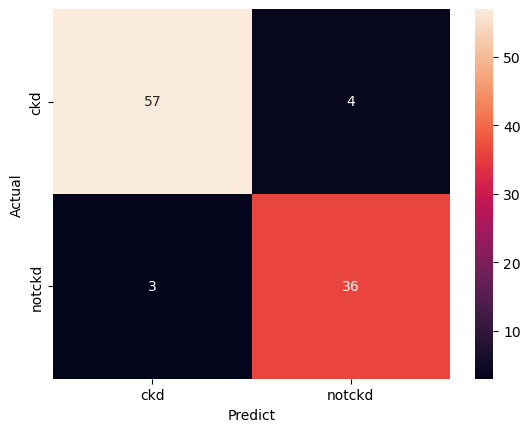

In [175]:
#Confusion Matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# cf= metrics.confusion_matrix(y_test, lr_predict)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True]) 

# cm_display.plot()
# plt.show() 

confusion_matrix = pd.crosstab(y_test, lr_predict, rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)


## Interpretation of the confusion matrix of Logistic Regression:

- The people that doesn't have Kidney disease, the model predicted correctly 55 people
- The model predicted 4 person that doesn't have kidney diease has the diease 
- 3 people that have kidney disease were predicted not to have kidney disease by the model
- 36 person was predicted correctly as having the kidney disease

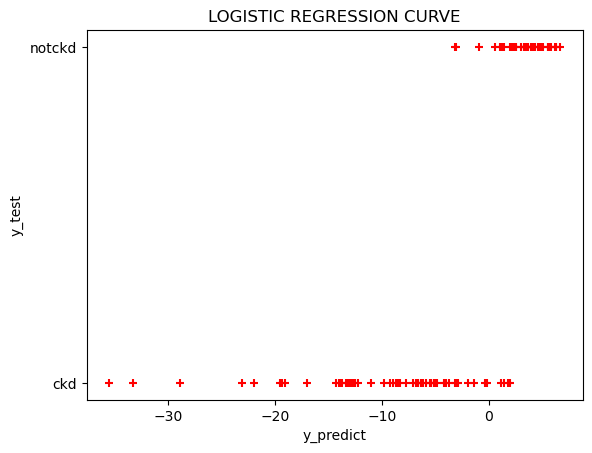

In [192]:
plt.scatter(lr_predict_g, y_test, marker = '+', color = 'red')
plt.title('LOGISTIC REGRESSION CURVE')
plt.ylabel('y_test')
plt.xlabel('y_predict')
plt.show()


## 
Receiver Operator Characteristic (ROC)

The ROC graph are points which summarizes confusion matixes of a given model at various major classification thresholds(i.e probability point to use in decision-making) in order to select the threshold that gives the optimal result. The graph is plotted using True positive rate(sensitivity) on the y-axis and False positive rate( 1 - specificity) on the x-axis.
Area Under The Curve (AUC)

AUC is the area under the ROC graph. AUC makes it easy to compare ROC curve of a model with ROC of another model in order to pick the model with largerest AUC.


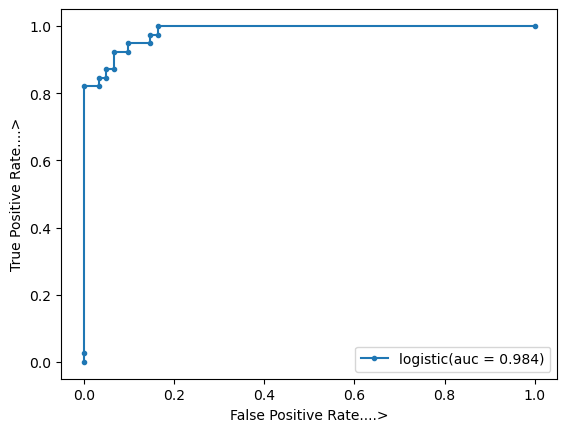

In [228]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)


# ROC ana AUC
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr , threshold = roc_curve(encoded_Y, lr_predict_g)
auc_logistic = auc(logistic_fpr, logistic_tpr)
# plt.figure(figsize = (5,5)), dpi = 100)
plt.plot(logistic_fpr, logistic_tpr, marker = '.', label = 'logistic(auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate....>')
plt.ylabel('True Positive Rate....>')
plt.legend()
plt.show()


## Applying KNN Model

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [177]:
# getting the best number of neighbors

n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
print(scores)
    # Select the lowest odd number with the highest accuracy

Accuracy for k= 1 is: 0.81
Accuracy for k= 2 is: 0.75
Accuracy for k= 3 is: 0.81
Accuracy for k= 4 is: 0.72
Accuracy for k= 5 is: 0.72
Accuracy for k= 6 is: 0.73
Accuracy for k= 7 is: 0.76
Accuracy for k= 8 is: 0.73
Accuracy for k= 9 is: 0.73
Accuracy for k= 10 is: 0.67
Accuracy for k= 11 is: 0.73
Accuracy for k= 12 is: 0.72
Accuracy for k= 13 is: 0.74
Accuracy for k= 14 is: 0.69
Accuracy for k= 15 is: 0.71
Accuracy for k= 16 is: 0.67
Accuracy for k= 17 is: 0.72
Accuracy for k= 18 is: 0.71
Accuracy for k= 19 is: 0.71
Accuracy for k= 20 is: 0.7
Accuracy for k= 21 is: 0.73
Accuracy for k= 22 is: 0.69
Accuracy for k= 23 is: 0.72
Accuracy for k= 24 is: 0.68
Accuracy for k= 25 is: 0.7
Accuracy for k= 26 is: 0.65
Accuracy for k= 27 is: 0.68
Accuracy for k= 28 is: 0.67
Accuracy for k= 29 is: 0.68
[0.81, 0.75, 0.81, 0.72, 0.72, 0.73, 0.76, 0.73, 0.73, 0.67, 0.73, 0.72, 0.74, 0.69, 0.71, 0.67, 0.72, 0.71, 0.71, 0.7, 0.73, 0.69, 0.72, 0.68, 0.7, 0.65, 0.68, 0.67, 0.68]


In [178]:
knn=KNeighborsClassifier(n_neighbors=3) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.81


Text(0, 0.5, 'Testing Accuracy')

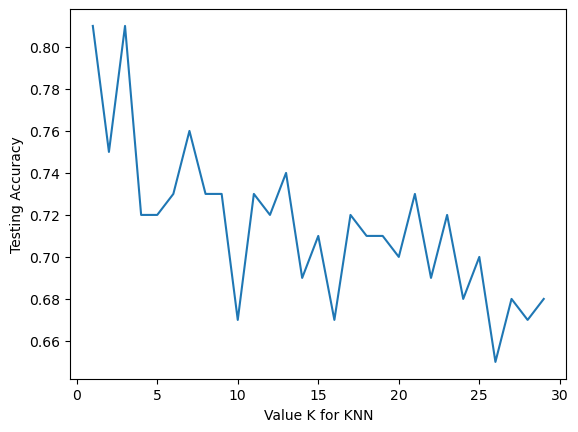

In [179]:
# Visualizing the KNN accurancy

plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
     


## the optimal number of neighbors is 3

## Using Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
#applying tree algorithm

tree = DecisionTreeClassifier()
z = tree.fit(x_train, y_train) #fitting our model 
     
y_predict = tree.predict(x_test) # evaluating our model

In [182]:
print('Acuuracy=',accuracy_score(y_predict,y_test))

Acuuracy= 0.97


<AxesSubplot:xlabel='Predict', ylabel='Actual'>

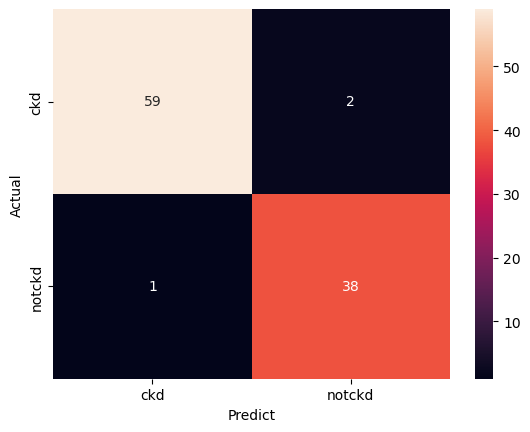

In [188]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)


## Interpretation of the confusion matrix of Decision Tree:

    The people that doesn't have Kidney disease, the model predicted correctly 59 people
    The model predicted 2 person that doesn't have kidney diease has the diease
    1 people that have kidney disease were predicted not to have kidney disease by the model
    38 person was predicted correctly as having the kidney disease



In [183]:
# Tree Visualization
import graphviz
from sklearn import tree

dot_tree = tree.export_graphviz(z, out_file=None,)

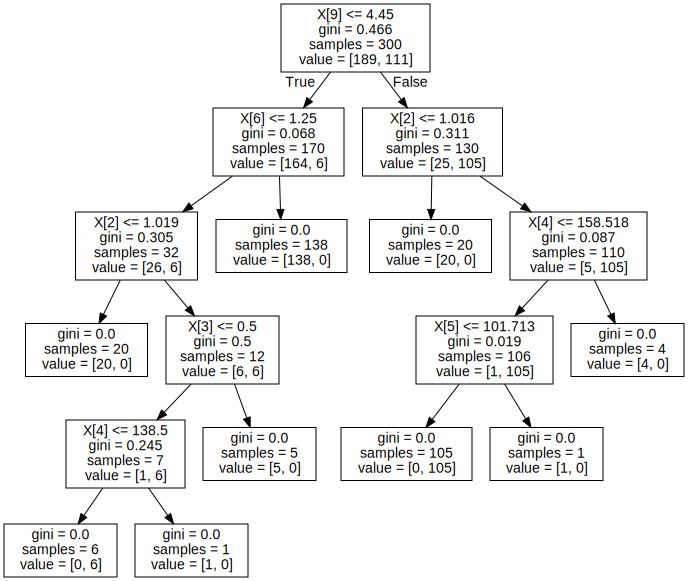

In [184]:
graph = graphviz.Source(dot_tree)
graph.render('data')
graph
     


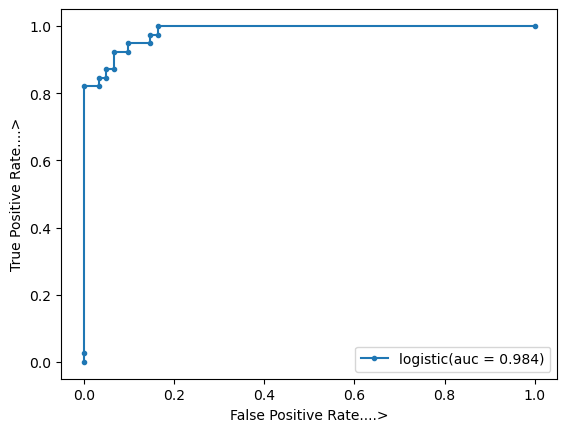

## Applying Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
     


RandomForestClassifier(n_estimators=50)

In [186]:
rf_pred = classifier.predict(x_test)

In [187]:
accuracy_score(rf_pred, y_test)

0.96

## Supervised Learning Model Summary

### Amongest the four models tested, Decision Tree has the highest accuracy of 97% Followed by Random Forest with 96%, then Logistic regression with 93% while KNN is the least with 81%

## Part2: unsupervised learning

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [209]:
data_ = data.drop(['id','red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                  'packed_cell_volume', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                  'appetite', 'pedal_edema', 'anemia', 'class'],  axis = 1)

In [210]:
data_

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,7800.0,5.20000
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,6000.0,2.85275
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,7500.0,2.85275
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,6700.0,3.90000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,7300.0,4.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,6700.0,4.90000
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,7800.0,6.20000
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,6600.0,5.40000
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,7200.0,5.90000


In [211]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as ss

In [212]:
#findind the number of Agglomerative clusters
Agg_score = []

for i in range(2,15):
     model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
     pre = model.fit_predict(data_)
     Agg_score = ss(data_, pre)
     print(i, 'score is : ', Agg_score)

2 score is :  0.6191427509624351
3 score is :  0.6472051920232187
4 score is :  0.647175154651531
5 score is :  0.54851027656228
6 score is :  0.5802892382786686
7 score is :  0.5759537518964862
8 score is :  0.6114404378701552
9 score is :  0.6180885922466196
10 score is :  0.6195099793023038
11 score is :  0.622200492837202
12 score is :  0.6090951392476832
13 score is :  0.6087960300850943
14 score is :  0.5960990934194398


In [213]:
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')# 3 has highest score
pre = model.fit_predict(data_)

In [214]:
data_['CLUSTER'] = pre

data_.head()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,white_blood_cell_count,red_blood_cell_count,CLUSTER
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,7800.0,5.20000,2
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,6000.0,2.85275,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,7500.0,2.85275,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,6700.0,3.90000,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,7300.0,4.60000,1


Text(0.5, 1.0, 'AGGLOMERATIVE CLUSTER COUNTS')

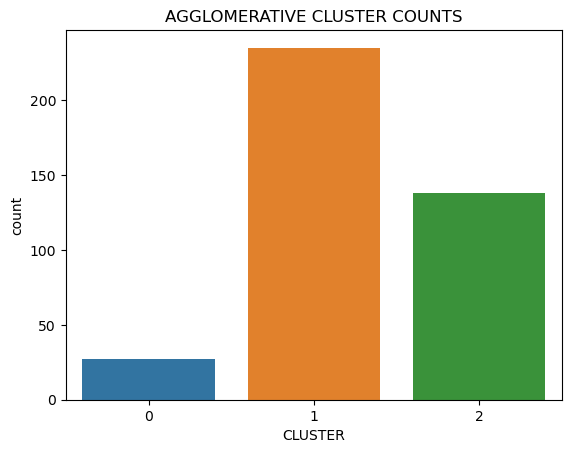

In [217]:

DF1 = data_[data_.CLUSTER ==0]
DF2 = data_[data_.CLUSTER ==1]
DF3 = data_[data_.CLUSTER ==2]

# print(DF1['CLUSTER'].value_counts())
# print(DF2['CLUSTER'].value_counts())
# print(DF3['CLUSTER'].value_counts())


#Visualizing the dataset clusters

import seaborn as sb

sb.countplot(x = 'CLUSTER', data = data_)
plt.title('AGGLOMERATIVE CLUSTER COUNTS')



     

     


## Plotting the Clausters

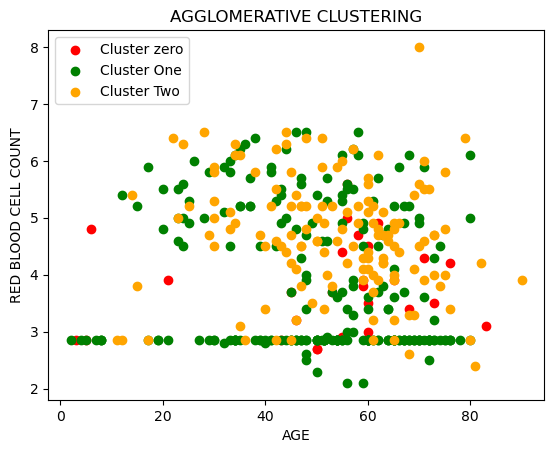

In [218]:

plt.scatter(DF1.age, DF1.red_blood_cell_count, c = 'red', label = 'Cluster zero')
plt.scatter(DF2['age'], DF2['red_blood_cell_count'], c = 'green', label = 'Cluster One')
plt.scatter(DF3['age'], DF3['red_blood_cell_count'], c = 'orange', label = 'Cluster Two')


plt.title('AGGLOMERATIVE CLUSTERING')
plt.xlabel('AGE')
plt.ylabel('RED BLOOD CELL COUNT')
plt.legend()

## The Dandogram

Text(0.5, 1.0, 'Dandrogram')

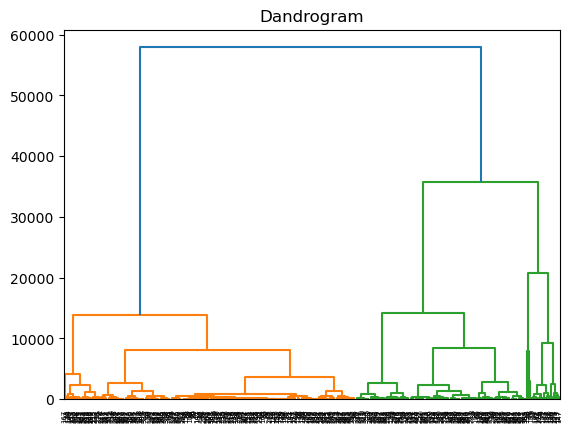

In [219]:
#Plotting the Dandrogram

import scipy.cluster.hierarchy as sch

den = sch.dendrogram(sch.linkage(data_, method = 'ward'))

plt.title('Dandrogram')
    


In [220]:
#KMEANS 

from sklearn.cluster import KMeans


# Finding the best number of clusters which cluster with highest silhouete score

sscore =[]
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, random_state = 50) 
    k_pre = kmeans.fit_predict(data_)
    sscore = ss(data_, k_pre)
    print(i, 'score is : ', sscore)



2 score is :  0.6590736006139136
3 score is :  0.6691056746509176
4 score is :  0.6437554771443031
5 score is :  0.5775067962544536
6 score is :  0.6189077587959598
7 score is :  0.6125307112933319
8 score is :  0.6131651103787196
9 score is :  0.6265841935531575
10 score is :  0.6269349703762516
11 score is :  0.626409525914462
12 score is :  0.6270139135338372
13 score is :  0.632121936143894
14 score is :  0.6220312772674715
15 score is :  0.6057155016180399
16 score is :  0.5903542727613135
17 score is :  0.5866162773370778
18 score is :  0.5912620928039999
19 score is :  0.5788759889996608


In [221]:
kmeans = KMeans(n_clusters = 3, random_state = 50)
k_pre = kmeans.fit_predict(data_)
sscore = ss(data_, k_pre)
print(sscore)




centroids = kmeans.cluster_centers_


0.6691056746509176


True     259
False    141
Name: Clusters, dtype: int64


Text(0.5, 1.0, 'KMEANS Cluster Counts')

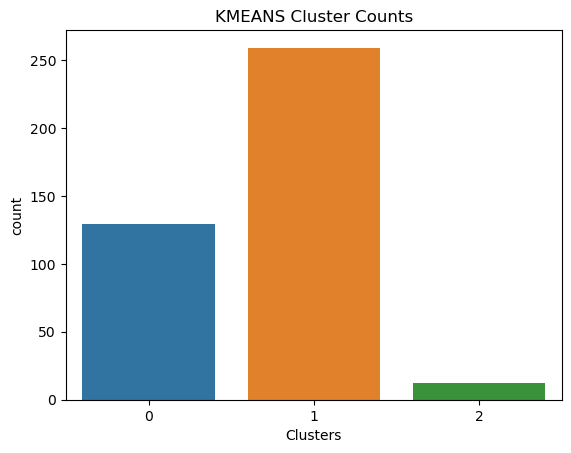

In [222]:
data_['Clusters'] = k_pre
print((data_.Clusters ==1).value_counts())

sb.countplot(x = 'Clusters', data = data_)
plt.title('KMEANS Cluster Counts')



     


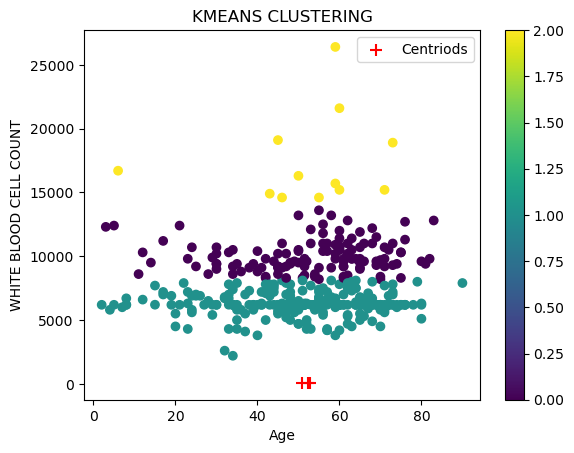

In [223]:
#KMEANS VISUALIZATION



y = plt.scatter(data_.age, data_.white_blood_cell_count, c = data_.Clusters)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, c ='red', marker = '+' , label = "Centriods")

plt.title('KMEANS CLUSTERING')
plt.xlabel('Age')
plt.ylabel('WHITE BLOOD CELL COUNT')
plt.legend()
plt.colorbar(y)


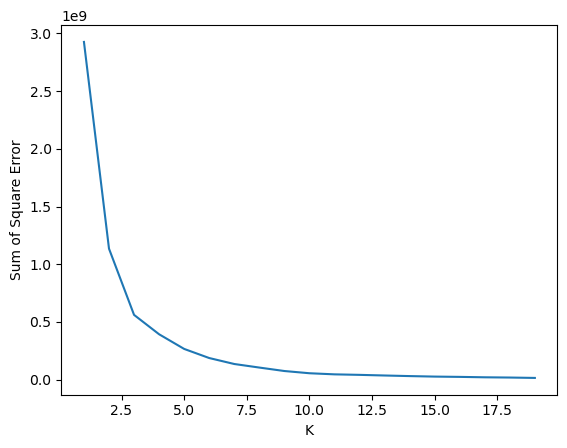

In [224]:
#Elbow Plot method to find the best number of clusters

k_range = range(1,20)
sse = []# This is the sum of square error
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(data_)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)



     


## Optimal K is 3

In [225]:
print(data_[data_.Clusters ==0].head(10))
print(data_[data_.Clusters ==1].head(10))
print(data_[data_.Clusters ==2].head(10))


     age  blood_pressure  specific_gravity  albumin  sugar  \
8   52.0           100.0             1.015      3.0    0.0   
9   53.0            90.0             1.020      2.0    0.0   
12  68.0            70.0             1.015      3.0    1.0   
14  68.0            80.0             1.010      3.0    2.0   
18  60.0           100.0             1.025      0.0    3.0   
20  61.0            80.0             1.015      2.0    0.0   
24  42.0           100.0             1.015      4.0    0.0   
25  61.0            60.0             1.025      0.0    0.0   
26  75.0            80.0             1.015      0.0    0.0   
27  69.0            70.0             1.010      3.0    4.0   

    blood_glucose_random  blood_urea  serum_creatinine      sodium  potassium  \
8             138.000000        60.0               1.9  137.528754   4.627244   
9              70.000000       107.0               7.2  114.000000   3.700000   
12            208.000000        72.0               2.1  138.000000   5.800